Домашнее задание по 2 неделе.

# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

params = {'n_neighbors': range(1, 21)}
folds = KFold(5,  random_state=10)

grid_searcher = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=folds)

grid_searcher.fit(X_train, y_train)

accuracy_score(y_test, grid_searcher.predict(X_test))


C:\Users\AmanovRA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


In [6]:
def train_grid_search(X, y):
    params = {'n_neighbors': range(1, 21)}
    grid_searcher = GridSearchCV(KNeighborsClassifier(), param_grid=params)
    grid_searcher.fit(X, y)
    return grid_searcher.cv_results_['mean_test_score']
    
    

mean_test_scores = []
for i in range(1000):
    X, y = make_moons(n_samples=1000, noise=0.5)
    mean_test_score = train_grid_search(X, y)
    mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

NameError: name 'plt' is not defined

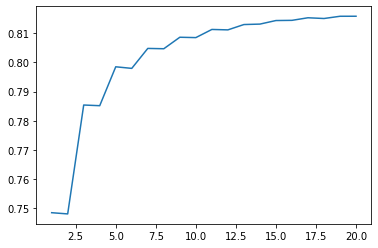

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [8]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"mv" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"mv" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [16]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np

mndata = MNIST('dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

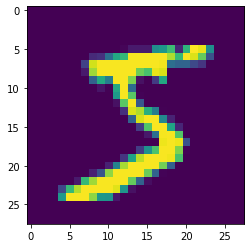

In [19]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

accuracy_score(y_test, knn.predict(X_test))

0.955

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

In [24]:
predicted = knn.predict(X_test)

In [34]:
np.unique(y_test[~np.equal(y_test, predicted)], return_counts=True)[1].sum()

540

In [29]:
np.unique(y_test[np.equal(y_test, predicted)], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1162, 1396, 1089, 1133, 1149, 1043, 1163, 1153, 1014, 1158],
       dtype=int64))

In [40]:
np.nonzero(~np.equal(y_test, predicted))[0]

array([    8,    62,    68,    93,   108,   175,   183,   228,   255,
         268,   286,   292,   327,   339,   347,   348,   353,   381,
         387,   399,   413,   421,   438,   439,   452,   492,   519,
         559,   596,   601,   621,   644,   712,   715,   725,   730,
         731,   800,   849,   872,   896,   983,   987,   993,  1010,
        1025,  1027,  1076,  1082,  1090,  1095,  1112,  1117,  1159,
        1163,  1173,  1204,  1259,  1324,  1343,  1413,  1416,  1419,
        1440,  1442,  1452,  1519,  1547,  1575,  1583,  1593,  1594,
        1595,  1602,  1637,  1638,  1661,  1679,  1693,  1695,  1704,
        1757,  1784,  1791,  1824,  1838,  1843,  1870,  1932,  1959,
        1977,  1984,  2006,  2106,  2116,  2167,  2192,  2210,  2218,
        2220,  2224,  2252,  2298,  2306,  2321,  2326,  2342,  2359,
        2392,  2405,  2467,  2514,  2537,  2603,  2694,  2699,  2727,
        2766,  2785,  2790,  2791,  2795,  2803,  2808,  2872,  2881,
        2891,  2899,

In [61]:
knn.kneighbors(X_test[[62]], n_neighbors=30)

(array([[1260.32892532, 1307.6811538 , 1319.478306  , 1337.24605066,
         1377.81239652, 1381.83573553, 1390.42331684, 1406.89551851,
         1407.99644886, 1413.91972898, 1419.70137705, 1427.07112647,
         1432.41893313, 1463.84527871, 1475.59343994, 1491.94168787,
         1493.61373855, 1495.15617913, 1497.23511848, 1500.38595035,
         1506.09063472, 1510.57472506, 1513.56929144, 1522.5820175 ,
         1524.75866943, 1524.88032317, 1525.67099992, 1526.49434981,
         1529.68330056, 1529.69768255]]),
 array([[19763, 44495,  1503,  8345, 12871, 21302, 27366, 23834, 35436,
         12529, 44651, 13443,  5337, 45696, 14264, 37131, 40587, 21984,
          6617, 13774, 33096,   287,  8359, 39530, 37207,  9732,   655,
         15993, 20347, 41867]], dtype=int64))

In [62]:
(y_test[62], predicted[62])

(8, 9)

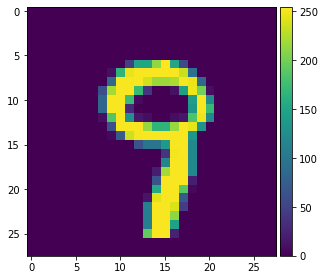

In [69]:
from skimage.io import imshow

imshow(X_train[27366].reshape((28, 28)))

In [ ]:
# очень похожие, субъективно, по написанию цифры